In [1]:

import torch
import torch.nn.functional as F
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from latex import latexify, format_axes
from pprint import pprint
from sklearn.manifold import TSNE
import torch._dynamo
import warnings

In [2]:
file = open("/content/Sherlock_Train.txt", "r")
Sherlock = file.read()

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
from typing import Callable
import re
import warnings


warnings.filterwarnings("ignore")
torch._dynamo.config.suppress_errors = True
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Supported Device: {device}\n\n")

hidden_size = 1024              # Hidden layer
learning_rate = 0.01
epochs = 1000


# Tokenize the text by words and filter out unwanted characters except for "."
filtered_text = re.sub(r"[^a-zA-Z0-9\s.]", "", Sherlock)  # Keep alphanumeric and period
words = (filtered_text.lower().split())[0:int((107510)/2.5)]  # Split by whitespace and lowercase
print(len(words))


Supported Device: cpu


43004


In [44]:
import os

# Define possible parameter values
embedding_dims = [32, 64, 128]  # Add more dimensions if needed
context_lengths = [3,5,10]    # Define context lengths you want to suppo
activation_functions = {'tanh': torch.tanh, 'relu' : torch.relu}
# Directory to save models
save_dir = '/content/Saved_models'
os.makedirs(save_dir, exist_ok=True)

In [45]:
# Build vocabulary of unique words
# unique_words=[" "]
unique_words= (sorted(set(words)))
unique_words = [" "] +  unique_words
word_to_idx = {word: idx for idx, word in enumerate(unique_words)}
idx_to_word = {idx: word for idx, word in enumerate(unique_words)}
vocab_size = len(unique_words)

for i in range(20):
  print(f'{i+200} ==> {idx_to_word[i+200]}')




200 ==> allow
201 ==> allowed
202 ==> alluded
203 ==> allusion
204 ==> allusions
205 ==> almost
206 ==> alone
207 ==> alone.
208 ==> along
209 ==> aloud.
210 ==> already
211 ==> also
212 ==> also.
213 ==> altar
214 ==> altar.
215 ==> alternately
216 ==> alternating
217 ==> although
218 ==> altogether
219 ==> always


In [51]:
encoded_text = [word_to_idx[word] for word in words]

sequences, next_words = [], []
sequence_length = 5


for i in range(len(encoded_text) - sequence_length):
    for j in range(sequence_length):
        padded_sequence = [0] * j + encoded_text[i:i + sequence_length - j]
        sequences.append(padded_sequence)
        next_words.append(encoded_text[i + sequence_length])

print(len(sequences))

for i in range(50):
    if i < len(sequences):
        sequence_words = [ idx_to_word[idx] for idx in sequences[i]]
        next_word = idx_to_word[next_words[i]]
        print(f"{sequence_words} ===> {next_word}")
    else:
        break






214995
['the', 'project', 'gutenberg', 'ebook', 'of'] ===> the
[' ', 'the', 'project', 'gutenberg', 'ebook'] ===> the
[' ', ' ', 'the', 'project', 'gutenberg'] ===> the
[' ', ' ', ' ', 'the', 'project'] ===> the
[' ', ' ', ' ', ' ', 'the'] ===> the
['project', 'gutenberg', 'ebook', 'of', 'the'] ===> adventures
[' ', 'project', 'gutenberg', 'ebook', 'of'] ===> adventures
[' ', ' ', 'project', 'gutenberg', 'ebook'] ===> adventures
[' ', ' ', ' ', 'project', 'gutenberg'] ===> adventures
[' ', ' ', ' ', ' ', 'project'] ===> adventures
['gutenberg', 'ebook', 'of', 'the', 'adventures'] ===> of
[' ', 'gutenberg', 'ebook', 'of', 'the'] ===> of
[' ', ' ', 'gutenberg', 'ebook', 'of'] ===> of
[' ', ' ', ' ', 'gutenberg', 'ebook'] ===> of
[' ', ' ', ' ', ' ', 'gutenberg'] ===> of
['ebook', 'of', 'the', 'adventures', 'of'] ===> sherlock
[' ', 'ebook', 'of', 'the', 'adventures'] ===> sherlock
[' ', ' ', 'ebook', 'of', 'the'] ===> sherlock
[' ', ' ', ' ', 'ebook', 'of'] ===> sherlock
[' ', ' ', ' ', 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Load embeddings from .npy files
trained_embeddings = np.load('/content/embeddings_trained_emb32_ctx3_relu.npy')  # Replace with your file path
untrained_embeddings = np.load('/content/embeddings_untrained_emb32_ctx3_relu.npy')  # Replace with your file path

# Combine or select one set for t-SNE (e.g., trained embeddings)
embeddings = untrained_embeddings[0:1000]  # or use np.concatenate((trained_embeddings, untrained_embeddings), axis=0)

# Apply t-SNE to reduce to 2 dimensions
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
embeddings_2d = tsne.fit_transform(embeddings)



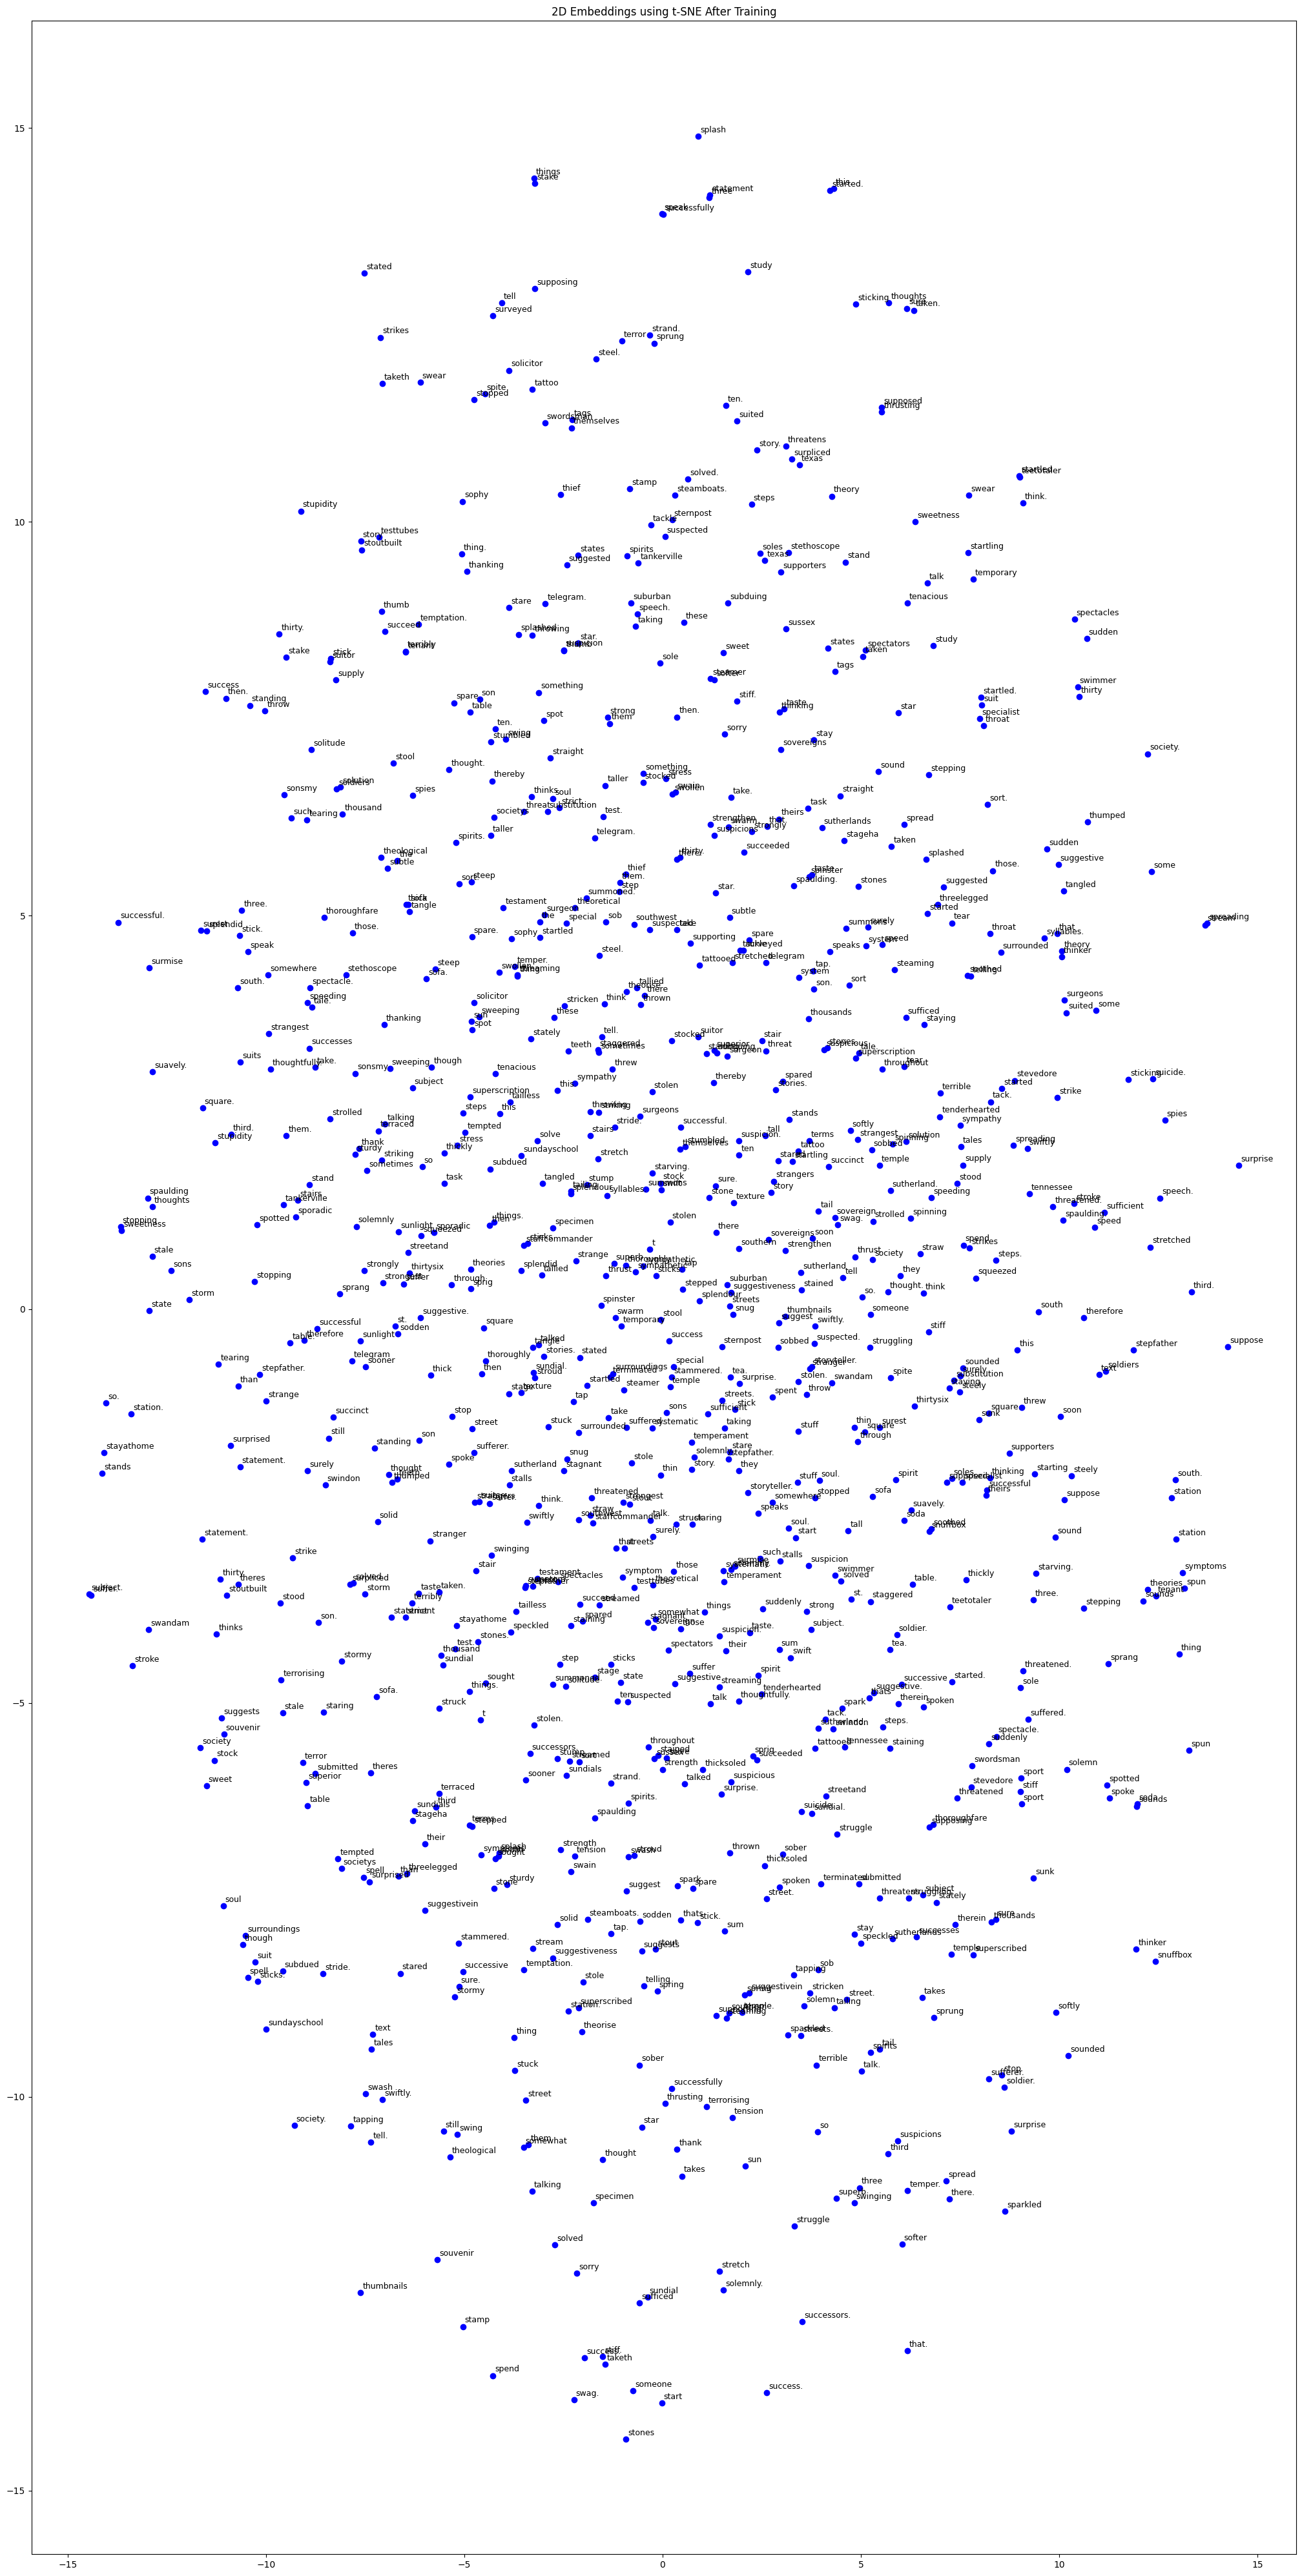

In [36]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch

def plot_emb(emb, itos, ax=None, title_before="2D Embeddings Before Training", title_after="2D Embeddings using t-SNE After Training"):
    # Check if input is a PyTorch embedding or a NumPy array
    if isinstance(emb, torch.nn.Embedding):
        emb_weights = emb.weight.detach().cpu().numpy()
    elif isinstance(emb, np.ndarray):
        emb_weights = emb
    else:
        raise TypeError("emb should be either a PyTorch nn.Embedding or a NumPy ndarray")

    if emb_weights.shape[1] != 2:
        tsne = TSNE(n_components=2)
        emb_2d = tsne.fit_transform(emb_weights)
        is_tsne = True
    else:
        emb_2d = emb_weights
        is_tsne = False

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))

    for i in range(len(emb)):
        x, y = emb_2d[i]
        ax.scatter(x, y, color='blue')
        ax.text(x + 0.05, y + 0.05, itos[i+5000], fontsize=9)

    ax.set_title(title_before if not is_tsne else title_after)
    return ax


plt.figure(figsize=(40, 40))
ax2 = plt.subplot(1, 2, 2)
plot_emb(trained_embeddings[5000:5500], idx_to_word, ax=ax2)
# plt.figure(figsize=(40, 40))
ax2 = plt.subplot(1, 2, 2)
plot_emb(untrained_embeddings[1500:2000], idx_to_word, ax=ax2)


plt.tight_layout()
plt.show()

In [ ]:
for act in activation_functions:
  print(act)

tanh
relu


In [ ]:


# Define the MLP Model for word embeddings with customizable embedding dimension
class CustomMLPForNextWord(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, context_length, activation_function: Callable):
        super(CustomMLPForNextWord, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)  # Embedding layer for words
        self.fc1 = nn.Linear(context_length * embedding_dim, hidden_size)
        self.fc2 = nn.Linear(hidden_size, vocab_size)
        self.activation = activation_function

    def forward(self, x):
        x = self.embedding(x)  # Convert word indices to embeddings
        x = x.view(-1, context_length * embedding_dim)  # Flatten input based on context length and embedding size
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
for activation_func in activation_functions:
    for embedding_dim in embedding_dims:
        for context_length in context_lengths:
            print(f'Embedding Size : {embedding_dim} and Context Length : {context_length} and Activation Function : {activation_func}', "\n\n")

            sequences, next_words = [], []
            for i in range(len(encoded_text) - context_length):
                sequences.append(encoded_text[i:i + context_length])
                next_words.append(encoded_text[i + context_length])

            # Convert to PyTorch tensors
            sequences = torch.tensor(sequences).to(device)
            next_words = torch.tensor(next_words).to(device)

            # Initialize model
            model = CustomMLPForNextWord(vocab_size, embedding_dim, hidden_size, context_length, activation_functions[activation_func]).to(device)

            # Save untrained embeddings
            untrained_embeddings = model.embedding.weight.data.cpu().numpy()  # Adjust to your embedding layer's name
            untrained_embedding_path = os.path.join(save_dir, f'embeddings_untrained_emb{embedding_dim}_ctx{context_length}_{activation_func}.npy')
            np.save(untrained_embedding_path, untrained_embeddings)
            print(f"Untrained embeddings saved at {untrained_embedding_path}")

            # Define loss and optimizer
            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr=learning_rate)

            # Training loop
            for epoch in range(epochs):
                outputs = model(sequences)
                loss = criterion(outputs, next_words)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                if loss < 1e-5:  # early stopping condition
                    break
                if (epoch + 1) % 50 == 0:
                    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

            # Save trained embeddings
            trained_embeddings = model.embedding.weight.data.cpu().numpy()  # Adjust to your embedding layer's name
            trained_embedding_path = os.path.join(save_dir, f'embeddings_trained_emb{embedding_dim}_ctx{context_length}_{activation_func}.npy')
            np.save(trained_embedding_path, trained_embeddings)
            print(f"Trained embeddings saved at {trained_embedding_path}")

            # Optionally save the model state (without embeddings)
            model_path = os.path.join(save_dir, f'model_state_emb{embedding_dim}_ctx{context_length}_{activation_func}.pth')
            torch.save(model.state_dict(), model_path)
            print(f"Model state (excluding embeddings) saved at {model_path}")


Embedding Size : 32 and Context Length : 3 and Activation Function : tanh 


Untrained embeddings saved at /content/Saved_models/embeddings_untrained_emb32_ctx3_tanh.npy
Epoch [50/1000], Loss: 1.1198
Epoch [100/1000], Loss: 0.1730
Epoch [150/1000], Loss: 0.1424
Epoch [200/1000], Loss: 0.1421
Epoch [250/1000], Loss: 0.1518
Epoch [300/1000], Loss: 0.1344
Epoch [350/1000], Loss: 0.1319
Epoch [400/1000], Loss: 0.1332
Epoch [450/1000], Loss: 0.1322
Epoch [500/1000], Loss: 0.1360
Epoch [550/1000], Loss: 0.1347
Epoch [600/1000], Loss: 0.1350
Epoch [650/1000], Loss: 0.1335
Epoch [700/1000], Loss: 0.1372
Epoch [750/1000], Loss: 0.1403
Epoch [800/1000], Loss: 0.1358
Epoch [850/1000], Loss: 0.1330
Epoch [900/1000], Loss: 0.1331
Epoch [950/1000], Loss: 0.1326
Epoch [1000/1000], Loss: 0.1365
Trained embeddings saved at /content/Saved_models/embeddings_trained_emb32_ctx3_tanh.npy
Model state (excluding embeddings) saved at /content/Saved_models/model_state_emb32_ctx3_tanh.pth
Embedding Size : 32 and

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

# Next-word prediction function
def predict_next_words(starting_seq: str, model, prediction_length: int):
    model.eval()
    generated_text = starting_seq

    # Tokenize and encode the starting sequence
    starting_seq = re.sub(r"[^a-zA-Z0-9\s.]", "", starting_seq.lower()).split()
    if len(starting_seq) > context_length :
      starting_seq = starting_seq[-context_length:]
    elif len(starting_seq) < context_length:
        starting_seq = [""] * (context_length - len(starting_seq)) + starting_seq
    else :
      starting_seq = starting_seq
    input_indices = [word_to_idx.get(word, 0) for word in starting_seq]

    for _ in range(prediction_length):
        with torch.no_grad():
            input_tensor = torch.tensor(input_indices).unsqueeze(0).to(device)
            output = model(input_tensor)
            pred_idx = output.argmax(dim=1).item()
            next_word = idx_to_word[pred_idx]

            generated_text += " " + next_word
            input_indices = input_indices[1:] + [pred_idx]  # Update context window with predicted word

    return generated_text

# Example of generating next words with starting sequence and prediction length
starting_seq = "About four hours after we began our journey, I awaked by a very ridiculous accident; for the carriage being stopped "  # Starting sequence for next-word prediction
prediction_length = 300         # Number of next words to predict
generated_text = predict_next_words(starting_seq, model, prediction_length)
print("Generated Text:", generated_text)


Generated Text: About four hours after we began our journey, I awaked by a very ridiculous accident; for the carriage being stopped  the very all last square to the most man. not evidence in the left. he buttons out in a knot in wines. of the drawer. between its your sherlock holmes asked you say this lad had shutter and this they have to prevent i didnt rate you have not an an idea of say that the strangest which he had intrusted to me. i hardened my heart and took the smokerocket from under my ulster. after all i thought we are not injuring her. we are but preventing her from injuring another. holmes had sat up upon the couch and i saw him motion like a man who is in need of air. a maid rushed across and threw open the window. at the same instant i saw him raise his hand and at the signal i tossed my rocket into the room with a cry of fire the word was no sooner out of my mouth than the whole crowd of spectators well dressed and illgentlemen ostlers and servant maidsjoined in a gener